# RFM Analysis in Python

**Customer Segmentation** : involves the systematic grouping of customers based on shared characteristics. It will support in marketing campagain , including targeted campaigns, and the cultivation of customer loyalty. Companies typically segment their customerin some metrics : encompassing demographics (such as age, gender, and location), behavior (including past orders and responses to messaging), and psychographics (involving values, interests, and lifestyles) .

**RFM (Recency-Frequency-Monetary)** analysis is a technique for behavior-based customer segmentation. This method involves grouping customers according to their purchasing records, specifically considering how recently, how frequently, and how much they have made purchases. RFM is a useful tool for identifying and understanding the behavior of the most valuable customers.

The goal of this analysis is to identify customer segments for global retail company using RFM analysis and to understand how those groups differ from each other

In [12]:
#Import library 
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
!pip install squarify
import squarify as sq

#Get data from excel
eco = pd.read_excel('C:/Users/phoni/Downloads/Final_project_RFM/Final_project_RFM/ecommerce retail.xlsx', sheet_name='ecommerce retail')
seg = pd.read_excel('C:/Users/phoni/Downloads/Final_project_RFM/Final_project_RFM/ecommerce retail.xlsx', sheet_name='Segmentation')


In [3]:
#Data exploration
#ecommerce retail sheet
#Check null value
eco.isnull().sum()

#In this dataset , we can see null value in description and customer ID



InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
eco.duplicated().sum()
#Need to count distinct if we need count all rows

5268

In [35]:
has_negative_value1 = (eco['Quantity'] < 0).any()
print(has_negative_value1)
#Quantity has negative value

True


In [33]:
has_negative_value1 = (eco['UnitPrice'] < 0).any()
print(has_negative_value1)
##Unitprice has negative value

True


In [18]:
eco['CustomerID'].is_unique

eco['StockCode'].is_unique

eco['InvoiceNo'].is_unique

#Those things is not unique
#Need to count distinct if we need count all rows

False

In [3]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [12]:
#segmenation

seg.isnull().sum()
#No null value

Segment      0
RFM Score    0
dtype: int64

In [21]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [16]:
seg.duplicated().sum()
#No null value

0

In [2]:
seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Segment    11 non-null     object
 1   RFM Score  11 non-null     object
dtypes: object(2)
memory usage: 308.0+ bytes


# Dataset overview
    
The retail dataset of a global superstore for years 2011-2012 is used in this analysis. 

It contains information about:

The column in ecommerce retail : InvoiceNo,	StockCode,	Description,	Quantity,	InvoiceDate,	UnitPrice,	CustomerID,	Country

The column in Segmentation : Segment	RFM, Score

Number of records in ecommerce retail  : 4,198,746

Number of records in Segmentation: 24

In [6]:
eco.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
seg.head()

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."


# Recency, Frequency, Monetary

RFM model combines three different customer attributes to rank customers:

**Rcency (R)**: Who have purchased recently? Number of days from last order

**Frequency (F)**: 
Who has purchased frequently? The total number of orders

**Monetary Value(M)**: 
Who has high purchase amount? The total money customer spent

The customer have high point when they they recency value is low, high frequency, monetary.

**How to create segments?**

After define the rank per segment by customer combine it in a column and rank it accroding in dataset

In [24]:
#Clean Data
#Drop null value
raw_data = eco[(eco['CustomerID'].notna()) 
#Remove negative value
               & (eco['Quantity']>0) 
               & (eco['UnitPrice']>0)]

#Calculate Recency value
raw_data['Lasted_order_day']=raw_data.groupby(['CustomerID'])['InvoiceDate'].transform('max')
raw_data['Recency'] = (pd.to_datetime('31/12/2011') - raw_data['Lasted_order_day']).dt.days

#Calculate Monetary value
raw_data['Total'] = raw_data['UnitPrice']*raw_data['Quantity']
raw_data['Monetary'] = raw_data.groupby(['CustomerID'])['Total'].transform('sum')

#Calculate Recency Value
raw_data['Frequency'] = raw_data.groupby(['CustomerID'])['InvoiceNo'].transform('nunique')

#Create a RFM table
transform_data = raw_data[['CustomerID','Recency','Frequency','Monetary']]

#Clean duplicate value
clean_data = transform_data.drop_duplicates().reset_index()

#Create RFM value
clean_data['R Value'] = pd.qcut(clean_data['Recency'],q=5,labels=[5,4,3,2,1])
clean_data['F Value'] = pd.qcut(clean_data['Frequency'].rank(method='first'),q=5,labels=[1,2,3,4,5])
clean_data['M Value'] = pd.qcut(clean_data['Monetary'],q=5,labels=[1,2,3,4,5])
clean_data['RFM'] = clean_data['R Value'].astype(str)+clean_data['F Value'].astype(str)+clean_data['M Value'].astype(str)

#Assign Segment for customer
def find_rfmvalue(RFM):
    for index,row in seg.iterrows():
        if RFM in row['RFM Score']:
            return row['Segment']
    return 'not find'
clean_data['Segment'] = clean_data['RFM'].apply(find_rfmvalue)
RFM = clean_data[['CustomerID','Recency','Frequency','Monetary','Segment']]

segment_data = RFM.groupby('Segment').agg(cus_count=('CustomerID','count'),
                                               avg_rec = ('Recency','mean'),
                                               avg_fre = ('Frequency','mean'),
                                               sum_mon = ('Monetary','sum')
                                      
                                     ).round(1)
segment_data['cus_share']= ((segment_data['cus_count']/segment_data['cus_count'].sum())*100).round(1)
segment_data['mon_share']= ((segment_data['sum_mon']/segment_data['sum_mon'].sum())*100).round(1)
segment_data.sort_values(by='cus_count',inplace=True)
segment_data


C:\Users\phoni\AppData\Local\Temp\ipykernel_29276\3528947671.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['Lasted_order_day']=raw_data.groupby(['CustomerID'])['InvoiceDate'].transform('max')
C:\Users\phoni\AppData\Local\Temp\ipykernel_29276\3528947671.py:10: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  raw_data['Recency'] = (pd.to_datetime('31/12/2011') - raw_data['Lasted_order_day']).dt.days
C:\Users\phoni\AppData\Local\Temp\ipykernel_29276\3528947671.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,cus_count,avg_rec,avg_fre,sum_mon,cus_share,mon_share
Segment,,,,,,
Promising,95,30.0,1.2,49652.6,2.2,0.6
Cannot Lose Them,112,267.6,1.9,217375.1,2.6,2.4
New Customers,160,43.7,1.1,37859.9,3.7,0.4
About To Sleep,259,97.4,1.3,61586.1,6.0,0.7
Need Attention,269,54.4,3.0,446013.1,6.2,5.0
At Risk,395,157.7,3.9,733297.1,9.1,8.2
Loyal,460,56.5,5.1,1070671.0,10.6,12.0
Potential Loyalist,461,49.3,2.4,255715.1,10.6,2.9
Lost customers,567,299.2,1.1,126018.6,13.1,1.4


# RFM Customer Segments

**Champions** - bought recently, buy often and spend the most

**Loyal Customers** - spend good money and often, responsive to promotions

**Potential Loyalist** - recent customers, but spent a good amount and bought more than once

**New Customers** - bought most recently, but not often

**Promising** - recent shoppers, but haven’t spent much

**Needing Attention** - above average recency, frequency and monetary values; may not have bought very recently though

**About To Sleep** - below average recency, frequency and monetary values; will lose them if not reactivated

**At Risk** - spent big money and purchased often but long time ago; need to bring them back

**Can't Loose Them** - made biggest purchases, and often but haven’t returned for a long time

**Hibernating** - last purchase was long back, low spenders and low number of orders

In [46]:
color1= sns.color_palette('GnBu',11)
color2= sns.color_palette('RdBu_r',11)

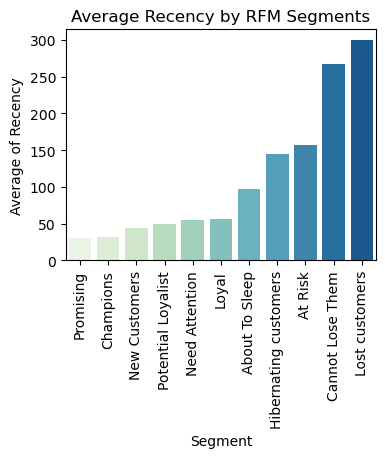

In [36]:


fig, ax = plt.subplots(1, figsize=(4,3))
segment_data_reset = segment_data.reset_index()
r_chart = sns.barplot(x='Segment',y='avg_rec',data= segment_data_reset.sort_values('avg_rec'),palette=colors1)
r_chart.set_title('Average Recency by RFM Segments')
r_chart.set_xlabel('Segment')
r_chart.set_ylabel('Average of Recency')
plt.xticks(rotation=90)
plt.show()

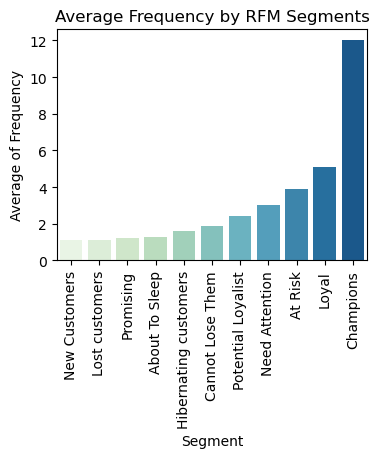

In [26]:
fig,ax = plt.subplots(1,figsize=(4,3))
r_chart=sns.barplot(x='Segment',y='avg_fre',data=segment_data_reset.sort_values('avg_fre'),palette=colors1)
r_chart.set_title('Average Frequency by RFM Segments')
r_chart.set_xlabel('Segment')
r_chart.set_ylabel('Average of Frequency')
plt.xticks(rotation=90)
plt.show()

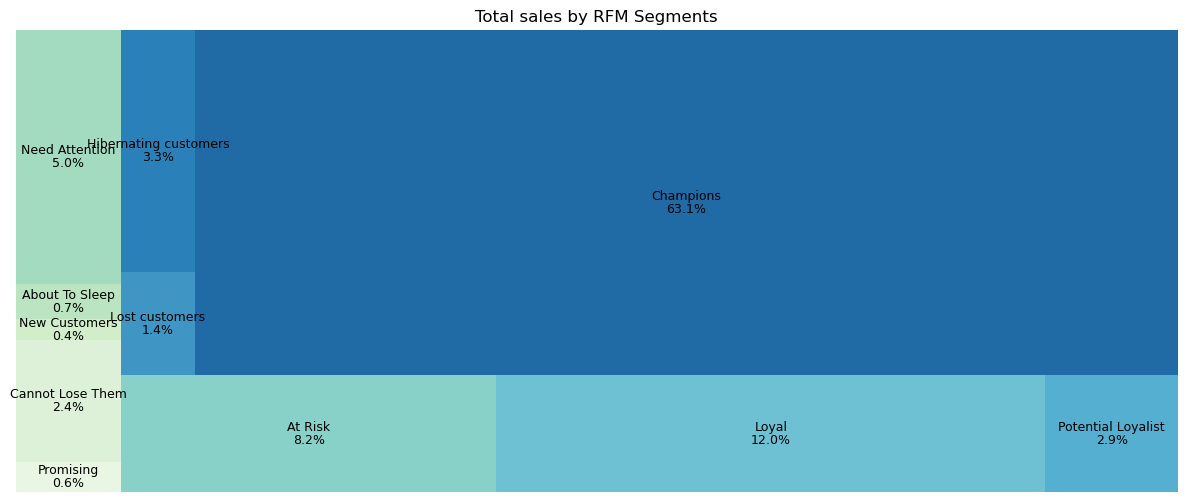

In [65]:

fig,ax = plt.subplots(1,figsize=(15,6))
sales_map = sq.plot(sizes=segment_data_reset['mon_share'], 
                    label=segment_data_reset['Segment'],
                    color=color1,
                    alpha=.9,
                    text_kwargs={'fontsize':9},
                    value=[f'{x}%' for x in segment_data_reset['mon_share']])
plt.title('Total sales by RFM Segments')
plt.axis("off")
plt.show()

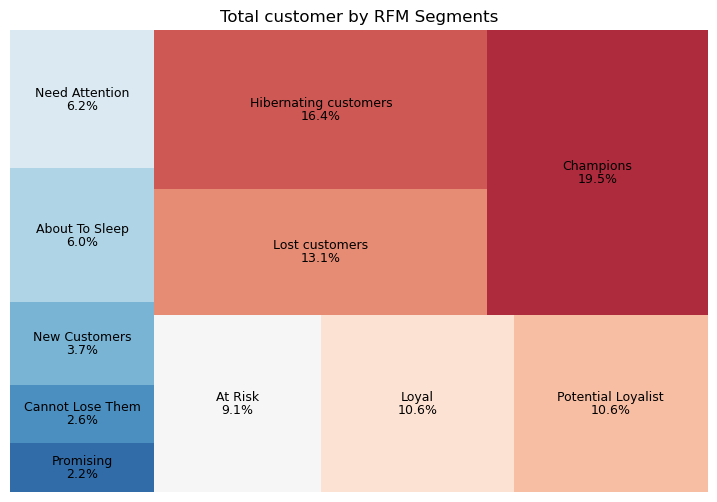

In [49]:
fig,ax = plt.subplots(1,figsize=(9,6))
sales_map = sq.plot(sizes=segment_data_reset['cus_share'], 
                    label=segment_data_reset['Segment'],
                    color=color2,
                    alpha=.9,
                    text_kwargs={'fontsize':9},
                    value=[f'{x}%' for x in segment_data_reset['cus_share']])
plt.title('Total customer by RFM Segments')
plt.axis("off")
plt.show()

In [138]:
rfm_evaluate = RFM[['Recency','Frequency','Monetary']]
rfm_evaluate.describe().round(1)


,Recency,Frequency,Monetary
count,4338.0,4338.0,4338.0
mean,113.1,4.3,2054.3
std,100.0,7.7,8989.2
min,21.0,1.0,3.8
25%,38.0,1.0,307.4
50%,71.0,2.0,674.5
75%,162.8,5.0,1661.7
max,394.0,209.0,280206.0


**Insight**

The data presented in the table reveals a notable high mean value for Recency, indicating that customers are inclined to discontinue their association with Superstore in the future. Conversely, there is an absence of positive signals in Frequency, with a mean value of 4.3, falling below the normal range, and a median of 2, signaling a significant concern for SuperStore. Despite these challenges, the Monetary aspect exhibits a positive side, with a mean value exceeding 2000

The charts illustrating revenue and customer distribution across segments highlight that the Champions group, constituting 19.15% of the customer base, contributes more than 60% of the revenue. Following closely in revenue are the Loyal and At-risk groups, contributing 12% and 8.2%, respectively. However, Hibernating and Lost customers account for 16.4% and 13.1%, respectively, yet purchase fewer types of products, at 3.3% and 1.4%, respectively. The Need Attention group, comprising 5% of revenue, represents only 6.2% of total customers, necessitating special attention

Examining the chart depicting customer segments, it is evident that the Championship group constitutes the largest portion at around 60%, signifying that Superstore possesses a considerable number of loyal customers

The revenue chart underscores the significance of the Championship and Loyal groups as the highest contributors to the store's earnings

The division of other customer groups into potential and in-danger categories reveals opportunities and risks. Potential customers include Hibernating customers, potential loyalists, promising, and new customers

**Recommendation**

To address these insights, it is imperative for Superstore to concentrate efforts on increasing both Recency and Frequency values. This strategic focus will likely contribute to customer retention and overall store performance

Superstore should focus efforts on engaging with the Need Attention group, understanding their preferences, and implementing strategies to enhance their contribution to both revenue and overall customer satisfaction

To maintain this strong customer base, Superstore should implement targeted marketing campaigns, such as personalized offers, exclusive discounts, and special services, to reinforce the loyalty of the Championship group

Superstore should implement marketing campaigns tailored to the Championship and Loyal groups, focusing on strategies like birthday gifts, new product experiences, discounted offerings, and personalized customer care to strengthen their loyalty

For potential customers, Superstore should introduce a loyalty program, engage actively on social media, and encourage customer referrals. In contrast, in-danger customers should be identified and rewarded for their value, while feedback should be actively sought and utilized for continuous improvement

**Finally**

In conclusion, Superstore should personalize marketing messages, provide exclusive benefits to loyal customers, and implement targeted strategies for potential and in-danger customer groups to enhance overall customer satisfaction and store performance